In [204]:
from samgeo import SamGeo3, download_file
from samgeo.common import show_image
sat_image_path = "converted_sat_images/image_27.jpg"

In [159]:
sam3 = SamGeo3(backend="transformers", device=None, checkpoint_path=None, load_from_HF=True)

Using mps device and transformers backend


Loading weights:   0%|          | 0/1468 [00:00<?, ?it/s]

In [205]:
sam3.set_image(sat_image_path)

In [206]:
#feature = features[0]
feature = "container ship"
sam3.generate_masks(prompt=feature)

Found one object.


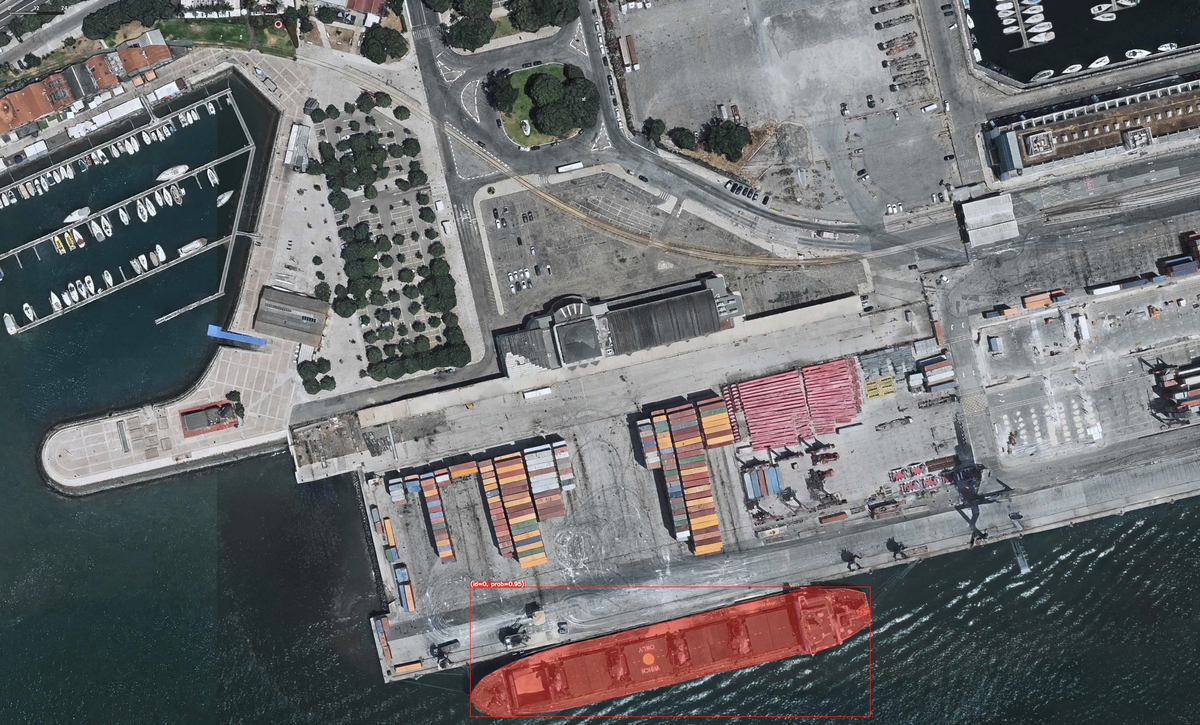

In [207]:
sam3.show_anns()

In [165]:
sam3.show_masks()

ValueError: No masks found. Please run generate_masks() first.

In [12]:
# Save masks with unique values for each object
# Since uc_berkeley.tif is a GeoTIFF, the output will also be a GeoTIFF
sam3.save_masks(output=f"{feature}_masks.tif", unique=True)

Saved 42 mask(s) to building_masks.tif


In [13]:
# Save as binary mask (all foreground pixels are 255)
sam3.save_masks(output=f"{feature}_masks_binary.tif", unique=False)

Saved 42 mask(s) to building_masks_binary.tif


In [14]:
# Save masks and confidence scores
# Each pixel in the scores image will have the confidence value of its mask
sam3.save_masks(
    output=f"{feature}_masks_with_scores.tif",
    save_scores=f"{feature}_scores.tif",
    unique=True,
)

Saved 42 mask(s) to building_masks_with_scores.tif
Saved confidence scores to building_scores.tif


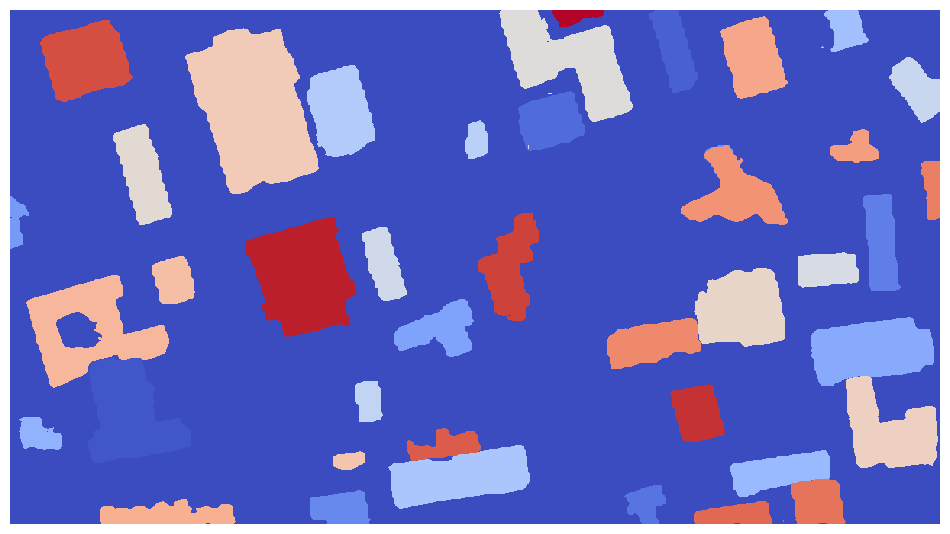

In [15]:
sam3.show_masks(cmap="coolwarm")

In [16]:
m.add_raster(f"{feature}_masks.tif", layer_name=f"{feature} masks", visible=False)
m.add_raster(
    f"{feature}_scores.tif",
    layer_name=f"{feature} scores",
    cmap="coolwarm",
    opacity=0.8,
    nodata=0,
)
m

Map(bottom=6479355.0, center=[37.87135, -122.25784999999999], controls=(ZoomControl(options=['position', 'zoom…